In [33]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

# Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

def wape(y_true, y_pred):
    # Prevent from dividing by 0 like in MAPE
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true))

def make_date_index(df):
    df["Date"] = [datetime(int(row["year"]), int(row["month"]), 1) for index, row in df.iterrows()]
    df["Date"] = pd.to_datetime(df["Date"])
    df.index = df["Date"]
    df.drop(columns=["Date"], inplace=True)

In [34]:
targets = ["Tiny+Small_+1", "Large+Mature_+1", "Tiny+Small_+2", "Large+Mature_+2", "Tiny+Small_+3", "Large+Mature_+3",
"Tiny+Small_+4", "Large+Mature_+4", "Tiny+Small_+5", "Large+Mature_+5", "Tiny+Small_+6", "Large+Mature_+6"]

In [35]:
base_targets = {"Tiny+Small_+1": "lag_Tiny+Small_11", "Tiny+Small_+2": "lag_Tiny+Small_10", "Tiny+Small_+3": "lag_Tiny+Small_9", "Tiny+Small_+4": "lag_Tiny+Small_8", 
           "Tiny+Small_+5": "lag_Tiny+Small_7", "Tiny+Small_+6": "lag_Tiny+Small_6", "Large+Mature_+1": "lag_Large+Mature_11", "Large+Mature_+2": "lag_Large+Mature_10", 
           "Large+Mature_+3": "lag_Large+Mature_9", "Large+Mature_+4": "lag_Large+Mature_8", "Large+Mature_+5": "lag_Large+Mature_7", "Large+Mature_+6": "lag_Large+Mature_6"}

In [36]:
base = pd.read_csv("./base/preds.csv")

In [37]:
base

,Date,FarmID,year,month,lag_Tiny+Small_1,lag_Tiny+Small_2,lag_Tiny+Small_3,lag_Tiny+Small_4,lag_Tiny+Small_5,lag_Tiny+Small_6,...,Tiny+Small_+3,Tiny+Small_+4,Tiny+Small_+5,Tiny+Small_+6,Large+Mature_+1,Large+Mature_+2,Large+Mature_+3,Large+Mature_+4,Large+Mature_+5,Large+Mature_+6
0,1999-01-01,AG10,1999,1,16.0,10.0,4.0,14.0,120.0,132.5,...,18.0,31.0,78.0,70.000000,11.0,17.0,14.0,11.0,36.0,69.000000
1,1999-02-01,AG10,1999,2,8.0,16.0,10.0,4.0,14.0,120.0,...,31.0,78.0,70.0,57.500000,17.0,14.0,11.0,36.0,69.0,86.500000
2,1999-03-01,AG10,1999,3,6.5,8.0,16.0,10.0,4.0,14.0,...,78.0,70.0,57.5,45.000000,14.0,11.0,36.0,69.0,86.5,104.000000
3,1999-04-01,AG10,1999,4,5.0,6.5,8.0,16.0,10.0,4.0,...,70.0,57.5,45.0,10.000000,11.0,36.0,69.0,86.5,104.0,72.000000
4,1999-05-01,AG10,1999,5,18.0,5.0,6.5,8.0,16.0,10.0,...,57.5,45.0,10.0,9.333333,36.0,69.0,86.5,104.0,72.0,53.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7787,2022-09-01,MA413,2022,9,10.0,42.0,27.0,11.0,2.0,8.0,...,15.0,6.0,1.0,2.000000,37.0,17.0,10.0,11.0,11.0,11.000000
7788,2022-10-01,MA413,2022,10,4.0,10.0,42.0,27.0,11.0,2.0,...,6.0,1.0,2.0,2.000000,17.0,10.0,11.0,11.0,11.0,3.000000
7789,2022-11-01,MA413,2022,11,2.0,4.0,10.0,42.0,27.0,11.0,...,1.0,2.0,2.0,3.000000,10.0,11.0,11.0,11.0,3.0,4.000000
7790,2022-12-01,MA413,2022,12,5.0,2.0,4.0,10.0,42.0,27.0,...,2.0,2.0,3.0,1.000000,11.0,11.0,11.0,3.0,4.0,1.000000


In [38]:
base.columns

Index(['Date', 'FarmID', 'year', 'month', 'lag_Tiny+Small_1',
       'lag_Tiny+Small_2', 'lag_Tiny+Small_3', 'lag_Tiny+Small_4',
       'lag_Tiny+Small_5', 'lag_Tiny+Small_6', 'lag_Tiny+Small_7',
       'lag_Tiny+Small_8', 'lag_Tiny+Small_9', 'lag_Tiny+Small_10',
       'lag_Tiny+Small_11', 'lag_Tiny+Small_12', 'lag_Large+Mature_1',
       'lag_Large+Mature_2', 'lag_Large+Mature_3', 'lag_Large+Mature_4',
       'lag_Large+Mature_5', 'lag_Large+Mature_6', 'lag_Large+Mature_7',
       'lag_Large+Mature_8', 'lag_Large+Mature_9', 'lag_Large+Mature_10',
       'lag_Large+Mature_11', 'lag_Large+Mature_12', 'Tiny+Small_+1',
       'Tiny+Small_+2', 'Tiny+Small_+3', 'Tiny+Small_+4', 'Tiny+Small_+5',
       'Tiny+Small_+6', 'Large+Mature_+1', 'Large+Mature_+2',
       'Large+Mature_+3', 'Large+Mature_+4', 'Large+Mature_+5',
       'Large+Mature_+6'],
      dtype='object')

In [39]:
raw_RF = pd.read_csv("./data_raw_RF/preds.csv")
raw_XGBoost = pd.read_csv("./data_raw_XGBoost/preds.csv")
raw_CatBoost = pd.read_csv("./data_raw_CatBoost/preds.csv")
FE_FS_RF = pd.read_csv("./data_FE_FS_RF/preds.csv")
FE_FS_XGBoost = pd.read_csv("./data_FE_FS_XGBoost/preds.csv")
FE_FS_CatBoost = pd.read_csv("./data_FE_FS_CatBoost/preds.csv")
raw_DNN_optim = pd.read_csv("./data_raw_DNN_optim/preds.csv")
FE_FS_DNN_optim = pd.read_csv("./data_FE_FS_DNN_optim/preds.csv")
raw_CNN_DNN_optim = pd.read_csv("./data_raw_CNN_DNN_optim/preds.csv")
FE_FS_CNN_DNN_optim = pd.read_csv("./data_FE_FS_CNN_DNN_optim/preds.csv")
raw_LSTM_DNN_optim = pd.read_csv("./data_raw_LSTM_DNN_optim/preds.csv")
FE_FS_LSTM_DNN_optim = pd.read_csv("./data_FE_FS_LSTM_DNN_optim/preds.csv")


In [40]:
preds = raw_RF.append(raw_XGBoost, ignore_index=True)
preds = preds.append(raw_CatBoost, ignore_index=True)
preds = preds.append(FE_FS_RF, ignore_index=True)
preds = preds.append(FE_FS_XGBoost, ignore_index=True)
preds = preds.append(FE_FS_CatBoost, ignore_index=True)
preds = preds.append(raw_DNN_optim, ignore_index=True)
preds = preds.append(FE_FS_DNN_optim, ignore_index=True)
preds = preds.append(raw_CNN_DNN_optim, ignore_index=True)
preds = preds.append(FE_FS_CNN_DNN_optim, ignore_index=True)
preds = preds.append(raw_LSTM_DNN_optim, ignore_index=True)
preds = preds.append(FE_FS_LSTM_DNN_optim, ignore_index=True)

C:\Users\BC127735\AppData\Local\Temp\ipykernel_5616\809554659.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  preds = raw_RF.append(raw_XGBoost, ignore_index=True)
C:\Users\BC127735\AppData\Local\Temp\ipykernel_5616\809554659.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  preds = preds.append(raw_CatBoost, ignore_index=True)
C:\Users\BC127735\AppData\Local\Temp\ipykernel_5616\809554659.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  preds = preds.append(FE_FS_RF, ignore_index=True)
C:\Users\BC127735\AppData\Local\Temp\ipykernel_5616\809554659.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  preds = preds.append(FE_FS_XGB

In [41]:
make_date_index(preds)

In [42]:
scores = {"Model": [], "target": [], "rmse_mean": [], "rmse_std": [], "wape_mean": [], "wape_std": [], "mae_mean": [], "mae_std": [], "r2_mean": [], "r2_std": []}
for model in preds["Model"].unique():
    for target in targets:
        scores["Model"].append(model)
        scores["target"].append(target)
        score_temp = {"rmse": [], "wape": [], "mae": [], "r2": []}
        for i in preds[preds["Model"] == model]["Iter_n"].unique():
            grouped_df = preds[(preds["Iter_n"] == i) & (preds["Model"] == model)].groupby("Date")[[target, f"{target}_pred"]].mean()
            score_temp["rmse"].append(math.sqrt(mse(grouped_df[target], grouped_df[f"{target}_pred"])))
            score_temp["wape"].append(wape(grouped_df[target], grouped_df[f"{target}_pred"]))
            score_temp["mae"].append(mae(grouped_df[target], grouped_df[f"{target}_pred"]))
            score_temp["r2"].append(r2_score(grouped_df[target], grouped_df[f"{target}_pred"]))
            
        scores["rmse_mean"].append(np.mean(score_temp["rmse"]))
        scores["rmse_std"].append(np.std(score_temp["rmse"]))
        scores["wape_mean"].append(np.mean(score_temp["wape"]))
        scores["wape_std"].append(np.std(score_temp["wape"]))
        scores["mae_mean"].append(np.mean(score_temp["mae"]))
        scores["mae_std"].append(np.std(score_temp["mae"]))
        scores["r2_mean"].append(np.mean(score_temp["r2"]))
        scores["r2_std"].append(np.std(score_temp["r2"]))

In [43]:
for target in base_targets.keys():
    scores["Model"].append("base")
    scores["target"].append(target)
    score_temp = {"rmse": [], "wape": [], "mae": [], "r2": []}
    
    score_temp["rmse"].append(math.sqrt(mse(base[target], base[base_targets[target]])))
    score_temp["wape"].append(wape(base[target], base[base_targets[target]]))
    score_temp["mae"].append(mae(base[target], base[base_targets[target]]))
    score_temp["r2"].append(r2_score(base[target], base[base_targets[target]]))
        
    scores["rmse_mean"].append(np.mean(score_temp["rmse"]))
    scores["rmse_std"].append(np.std(score_temp["rmse"]))
    scores["wape_mean"].append(np.mean(score_temp["wape"]))
    scores["wape_std"].append(np.std(score_temp["wape"]))
    scores["mae_mean"].append(np.mean(score_temp["mae"]))
    scores["mae_std"].append(np.std(score_temp["mae"]))
    scores["r2_mean"].append(np.mean(score_temp["r2"]))
    scores["r2_std"].append(np.std(score_temp["r2"]))

In [44]:
auto_arima_scores = pd.read_csv("./auto_arima/global_scores.csv")

In [45]:
auto_arima_scores = auto_arima_scores.iloc[:, 1:]

In [46]:
auto_arima_scores

,Model,target,rmse_mean,rmse_std,wmape_mean,wmape_std,mae_mean,mae_std,r2_mean,r2_std
0,Auto-arima,Tiny+Small_+1,16.743548,0.0,0.783014,0.0,12.522466,0.0,-0.256393,0.0
1,Auto-arima,Large+Mature_+1,13.426159,0.0,0.364026,0.0,10.307831,0.0,0.713987,0.0
2,Auto-arima,Tiny+Small_+2,16.766270,0.0,0.765939,0.0,13.077279,0.0,-0.160007,0.0
3,Auto-arima,Large+Mature_+2,19.684531,0.0,0.598381,0.0,16.024280,0.0,0.357470,0.0
4,Auto-arima,Tiny+Small_+3,22.523409,0.0,0.821939,0.0,16.861828,0.0,-0.566252,0.0
5,Auto-arima,Large+Mature_+3,21.235628,0.0,0.982014,0.0,17.098593,0.0,-1.138335,0.0
6,Auto-arima,Tiny+Small_+4,28.326515,0.0,0.716377,0.0,19.963728,0.0,-0.591777,0.0
7,Auto-arima,Large+Mature_+4,20.344190,0.0,1.066300,0.0,15.822003,0.0,-2.044195,0.0
8,Auto-arima,Tiny+Small_+5,31.565843,0.0,0.700929,0.0,21.656654,0.0,-0.571821,0.0
9,Auto-arima,Large+Mature_+5,22.310236,0.0,1.212147,0.0,18.324804,0.0,-2.966546,0.0


In [47]:
pd.DataFrame(scores).append(auto_arima_scores).to_csv("./results_preds.csv") # For the PowerBI

C:\Users\BC127735\AppData\Local\Temp\ipykernel_5616\1934243424.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pd.DataFrame(scores).append(auto_arima_scores).to_csv("./results_preds.csv")


In [48]:
pd.DataFrame(scores)

,Model,target,rmse_mean,rmse_std,wape_mean,wape_std,mae_mean,mae_std,r2_mean,r2_std
0,data_raw_RandomForest_no_optim,Tiny+Small_+1,14.048831,5.498826,0.246548,0.037413,8.769737,2.148753,0.630597,0.093197
1,data_raw_RandomForest_no_optim,Large+Mature_+1,8.919675,3.948819,0.177129,0.047159,6.034854,1.765936,0.761076,0.094342
2,data_raw_RandomForest_no_optim,Tiny+Small_+2,16.917175,5.599973,0.319549,0.033691,11.324046,2.184671,0.471087,0.085897
3,data_raw_RandomForest_no_optim,Large+Mature_+2,9.287125,3.729236,0.188335,0.041298,6.386638,1.585083,0.725455,0.098279
4,data_raw_RandomForest_no_optim,Tiny+Small_+3,17.954503,5.103423,0.344701,0.037895,12.261189,2.280115,0.398164,0.091778
...,...,...,...,...,...,...,...,...,...,...
151,base,Large+Mature_+2,32.053208,0.000000,0.620767,0.000000,21.453401,0.000000,0.033799,0.000000
152,base,Large+Mature_+3,31.972961,0.000000,0.620842,0.000000,21.371692,0.000000,0.035488,0.000000
153,base,Large+Mature_+4,31.880245,0.000000,0.620895,0.000000,21.286816,0.000000,0.037012,0.000000
154,base,Large+Mature_+5,31.861009,0.000000,0.622579,0.000000,21.272752,0.000000,0.034760,0.000000


Time series predictions comparison - In this section checking manually for each target, which model had which metric smallest and largest.

In [21]:
scores = pd.DataFrame(scores).append(auto_arima_scores)

C:\Users\BC127735\AppData\Local\Temp\ipykernel_14524\3211883113.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = pd.DataFrame(scores).append(auto_arima_scores)


In [29]:
temp = scores[(scores["target"] == "Tiny+Small_+6")]
temp[temp["rmse_mean"] == temp["rmse_mean"].max()]

,Model,target,rmse_mean,rmse_std,wmape_mean,wmape_std,mae_mean,mae_std,r2_mean,r2_std
149,base,Tiny+Small_+6,43.958516,0.0,0.715511,0.0,25.244318,0.0,-0.033126,0.0


In [153]:
temp = scores[(scores["target"] == "Large+Mature_+6")]
temp[temp["wmape_mean"] == temp["wmape_mean"].max()]

,Model,target,rmse_mean,rmse_std,wmape_mean,wmape_std,mae_mean,mae_std,r2_mean,r2_std
11,Auto-arima,Large+Mature_+6,27.431954,0.0,0.992409,0.0,21.760035,0.0,-1.835478,0.0


In [154]:
temp = scores[(scores["target"] == "Large+Mature_+6")]
temp[temp["mae_mean"] == temp["mae_mean"].max()]

,Model,target,rmse_mean,rmse_std,wmape_mean,wmape_std,mae_mean,mae_std,r2_mean,r2_std
11,Auto-arima,Large+Mature_+6,27.431954,0.0,0.992409,0.0,21.760035,0.0,-1.835478,0.0


In [155]:
temp = scores[(scores["target"] == "Large+Mature_+6")]
temp[temp["r2_mean"] == temp["r2_mean"].min()]

,Model,target,rmse_mean,rmse_std,wmape_mean,wmape_std,mae_mean,mae_std,r2_mean,r2_std
11,Auto-arima,Large+Mature_+6,27.431954,0.0,0.992409,0.0,21.760035,0.0,-1.835478,0.0


Neural network optimilization history

In [29]:
opt_results_raw_DNN = pd.read_csv("./data_raw_DNN_optim/optim_results.csv")
opt_results_FE_FS_DNN = pd.read_csv("./data_FE_FS_DNN_optim/optimal_results.csv")
opt_results_raw_CNN_DNN = pd.read_csv("./data_raw_CNN_DNN_optim/opt_results.csv")
opt_results_FE_FS_CNN_DNN = pd.read_csv("./data_FE_FS_CNN_DNN_optim/opt_results_random.csv")
opt_results_raw_LSTM_DNN = pd.read_csv("./data_raw_LSTM_DNN_optim/opt_results_random.csv")
opt_results_FE_FS_LSTM_DNN = pd.read_csv("./data_FE_FS_LSTM_DNN_optim/opt_results_random.csv")

In [24]:
opt_results_raw_DNN[opt_results_raw_DNN["wmape_mean"] == opt_results_raw_DNN["wmape_mean"].min()]

,Unnamed: 0,neurons_layer,activation_layer,learning_rate,optimizer,dropout,batch_size,rmse_mean,rmse_std,mae_mean,mae_std,wmape_mean,wmape_std,r2_mean,r2_std
47,47,94,softplus,0.00014,<keras.optimizers.nadam.Nadam object at 0x0000...,0.05,18,30.153019,7.171234,18.847584,1.909747,0.568931,0.057633,0.259647,0.076729


In [26]:
opt_results_FE_FS_DNN[opt_results_raw_DNN["wmape_mean"] == opt_results_raw_DNN["wmape_mean"].min()]

,Unnamed: 0,neurons_layer,activation_layer,learning_rate,optimizer,batch_size,dropout,rmse_mean,rmse_std,mae_mean,mae_std,wmape_mean,wmape_std,r2_mean,r2_std
47,47,21,relu,0.00089,<keras.optimizers.adam.Adam object at 0x000002...,43,0.03,30.73104,6.800339,19.604795,1.997848,0.59166,0.059128,0.225422,0.089789


In [30]:
opt_results_raw_CNN_DNN[opt_results_raw_CNN_DNN["wmape_mean"] == opt_results_raw_CNN_DNN["wmape_mean"].min()]

,Unnamed: 0,neurons_CNN,neurons_dense_1,neurons_dense_2,neurons_dense_3,neurons_dense_4,activation,dropout_rate,learning_rate,optimizer,batch_size,rmse_mean,rmse_std,mae_mean,mae_std,wmape_mean,wmape_std,r2_mean,r2_std
25,25,28,83,85,193,91,relu,0.06,0.0089,<keras.optimizers.adam.Adam object at 0x000001...,17,30.484307,6.928605,19.076207,1.721496,0.577111,0.065338,0.238517,0.093041


In [31]:
opt_results_FE_FS_CNN_DNN[opt_results_FE_FS_CNN_DNN["wmape_mean"] == opt_results_FE_FS_CNN_DNN["wmape_mean"].min()]

,Unnamed: 0,neurons_CNN,neurons_dense,activation,learning_rate,optimizer,batch_size,dropout,rmse_mean,rmse_std,mae_mean,mae_std,wmape_mean,wmape_std,r2_mean,r2_std
47,47,61,67,relu,0.00026,<keras.optimizers.adam.Adam object at 0x000001...,49,0.1,30.667676,4.963612,19.472439,1.859674,0.527902,0.041977,0.333464,0.086584


In [33]:
opt_results_raw_LSTM_DNN[opt_results_raw_LSTM_DNN["wmape_mean"] == opt_results_raw_LSTM_DNN["wmape_mean"].min()]

,Unnamed: 0,neurons_LSTM,neurons_dense,activation_dense,learning_rate,optimizer,batch_size,dropout,rmse_mean,rmse_std,mae_mean,mae_std,wmape_mean,wmape_std,r2_mean,r2_std
33,33,90,13,linear,0.00028,<keras.optimizers.adadelta.Adadelta object at ...,7,0.7,33.658188,7.447296,22.32771,2.285932,0.673823,0.056274,0.07555,0.077147


In [32]:
opt_results_FE_FS_LSTM_DNN[opt_results_FE_FS_LSTM_DNN["wmape_mean"] == opt_results_FE_FS_LSTM_DNN["wmape_mean"].min()]

,Unnamed: 0,neurons_LSTM,neurons_dense,activation_dense,learning_rate,optimizer,batch_size,dropout,rmse_mean,rmse_std,mae_mean,mae_std,wmape_mean,wmape_std,r2_mean,r2_std
13,13,82,63,linear,0.00069,<keras.optimizers.adagrad.Adagrad object at 0x...,39,0.9,34.6483,4.679957,23.131777,1.438054,0.628749,0.030943,0.147764,0.054344


Neural networks val_loss history

In [4]:
raw_DNN_no_optim_history = pd.read_csv("./data_raw_DNN_no_optim/history.csv").iloc[:, 1:]
raw_LSTM_no_optim_history = pd.read_csv("./data_raw_LSTM_no_optim/history.csv").iloc[:, 1:]
raw_CNN_no_optim_history = pd.read_csv("./data_raw_CNN_no_optim/history.csv").iloc[:, 1:]
raw_CNN_DNN_no_optim_history = pd.read_csv("./data_raw_CNN_DNN_no_optim/history.csv").iloc[:, 1:]
raw_LSTM_DNN_no_optim_history = pd.read_csv("./data_raw_LSTM_DNN_no_optim/history.csv").iloc[:, 1:]
raw_LSTM_DNN_optim_lag_3 = pd.read_csv("./data_raw_LSTM_DNN_optim_lag_3/history.csv").iloc[:, 1:]

In [6]:
import itertools

def flatten_list(nested_list):
    return list(itertools.chain(*nested_list))

def plot_history(df, title):
    epochs_list = []
    for i in df["Iter_n"].unique():
        epochs_list.append(list(range(1, len(df[df["Iter_n"] == i])+1)))

    df["Epoch"] = flatten_list(epochs_list)
    fig, axes = plt.subplots(nrows=3, ncols=2, constrained_layout = True)
    fig.delaxes(axes[2, 1])

    axes[0, 0].title.set_text("Iter 1")
    axes[0, 0].get_xaxis().get_label().set_visible(False)
    axes[0, 1].title.set_text("Iter 2")
    axes[0, 1].get_xaxis().get_label().set_visible(False)
    axes[1, 0].title.set_text("Iter 3")
    axes[1, 0].get_xaxis().get_label().set_visible(False)
    axes[1, 1].title.set_text("Iter 4")
    axes[1, 1].get_xaxis().get_label().set_visible(False)
    axes[2, 0].title.set_text("Iter 5")
    axes[2, 0].get_xaxis().get_label().set_visible(False)
    
    fig.suptitle(title)
    fig.supxlabel("Epoch")
    fig.supylabel("Loss")
    fig.set_figheight(10)
    fig.set_figwidth(10)
    fig.legend(["Val_loss", "loss"])
    df[df["Iter_n"] == 1].plot(x="Epoch", y=["loss", "val_loss"], ax=axes[0, 0])
    df[df["Iter_n"] == 2].plot(x="Epoch", y=["loss", "val_loss"], ax=axes[0, 1], legend=False)
    df[df["Iter_n"] == 3].plot(x="Epoch", y=["loss", "val_loss"], ax=axes[1, 0], legend=False)
    df[df["Iter_n"] == 4].plot(x="Epoch", y=["loss", "val_loss"], ax=axes[1, 1], legend=False)
    df[df["Iter_n"] == 5].plot(x="Epoch", y=["loss", "val_loss"], ax=axes[2, 0], legend=False)


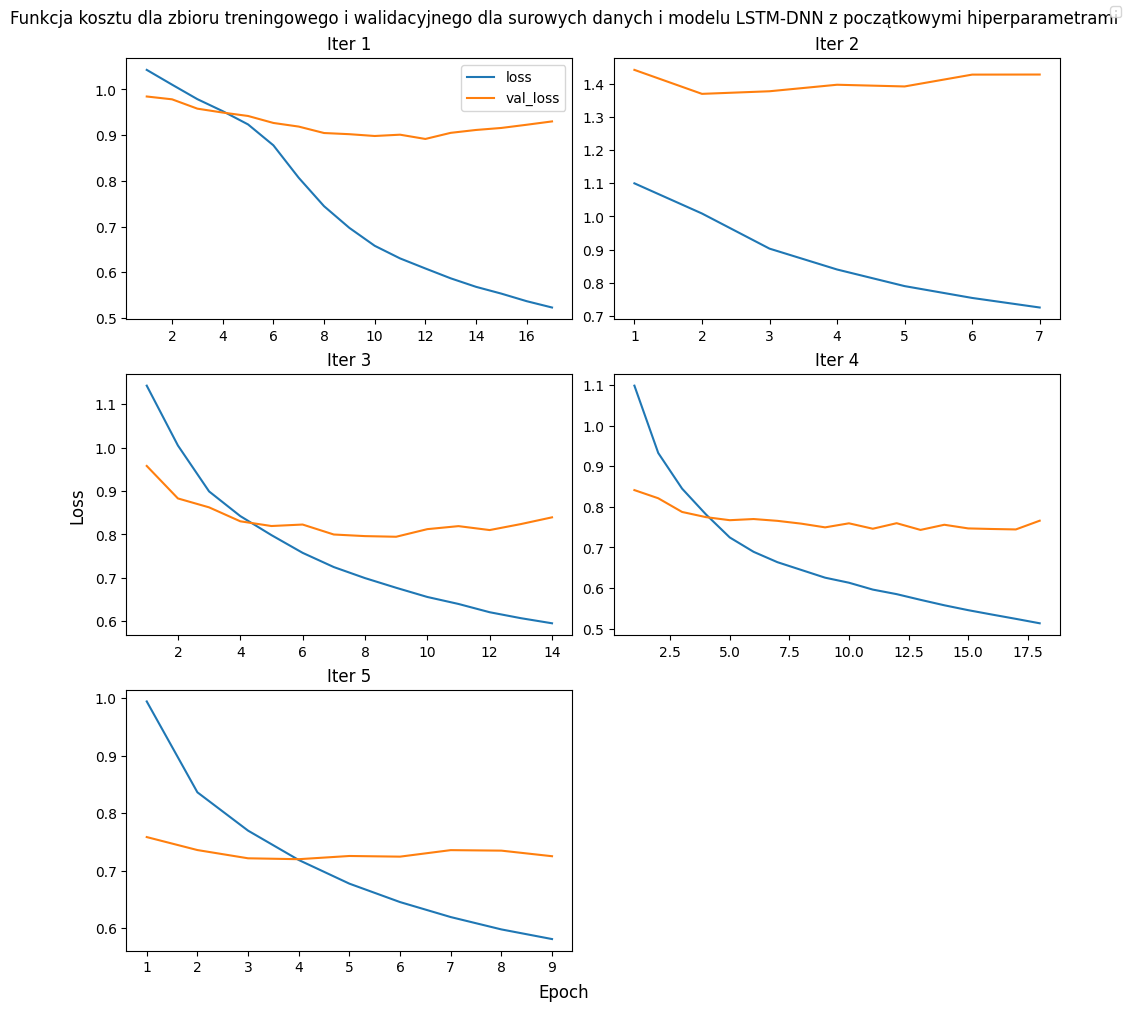

In [9]:
plot_history(raw_LSTM_DNN_no_optim_history, "Funkcja kosztu dla zbioru treningowego i walidacyjnego dla surowych danych i modelu LSTM-DNN z początkowymi hiperparametrami")

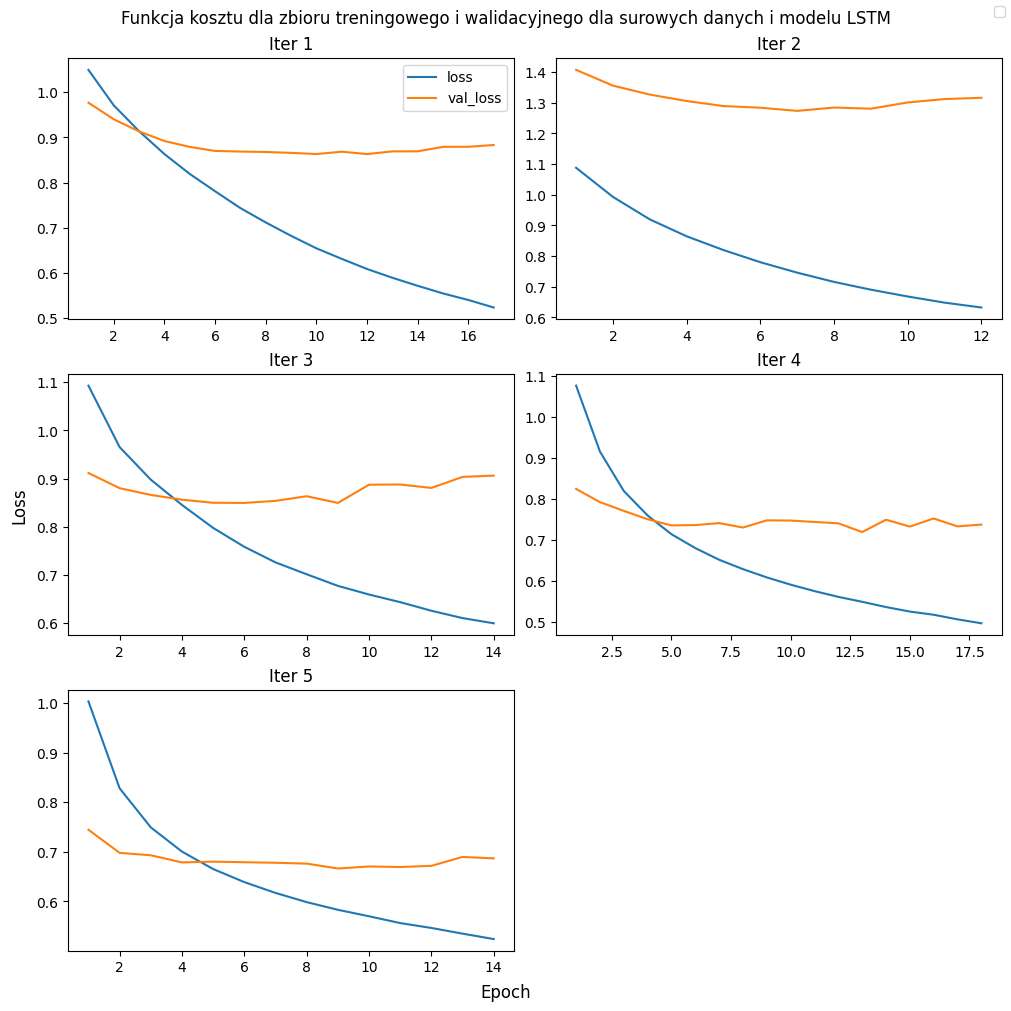

In [188]:
plot_history(raw_LSTM_no_optim_history, "Funkcja kosztu dla zbioru treningowego i walidacyjnego dla surowych danych i modelu LSTM")

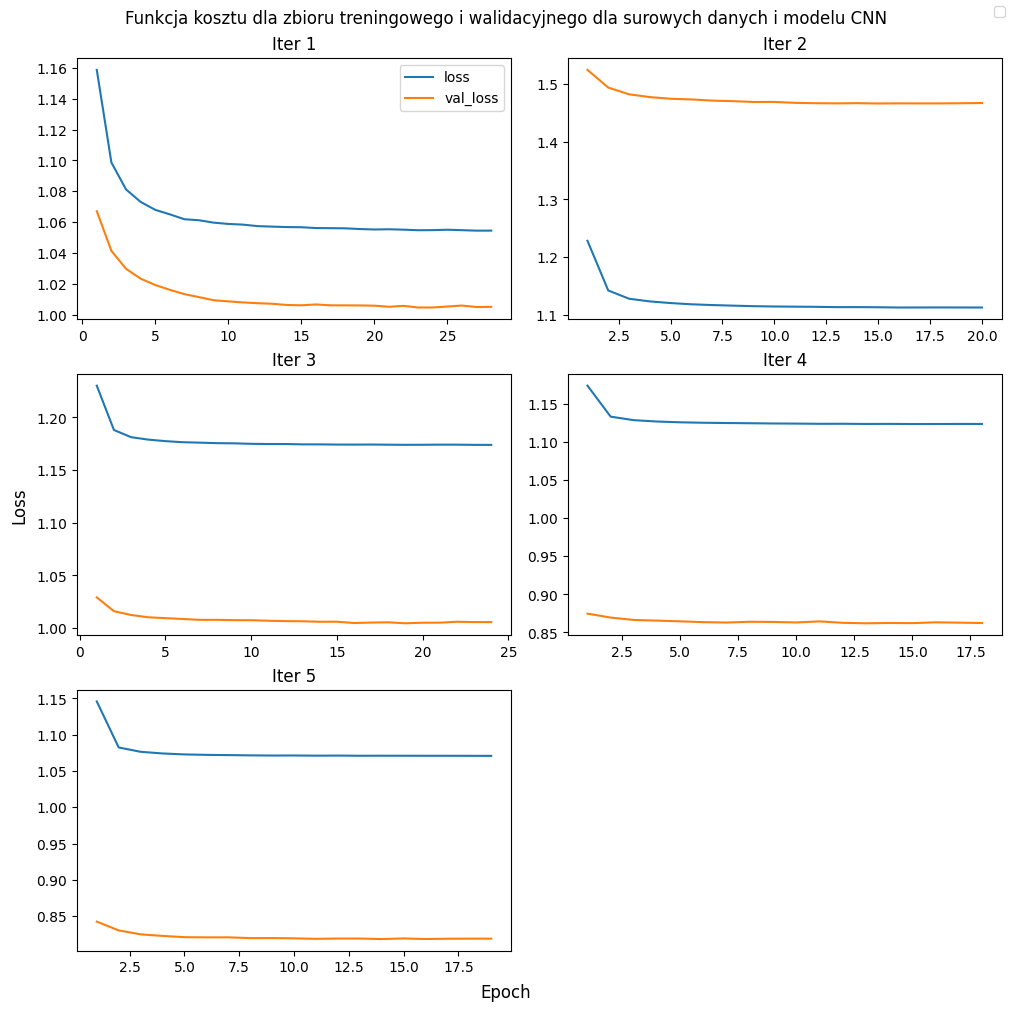

In [189]:
plot_history(raw_CNN_no_optim_history, "Funkcja kosztu dla zbioru treningowego i walidacyjnego dla surowych danych i modelu CNN")

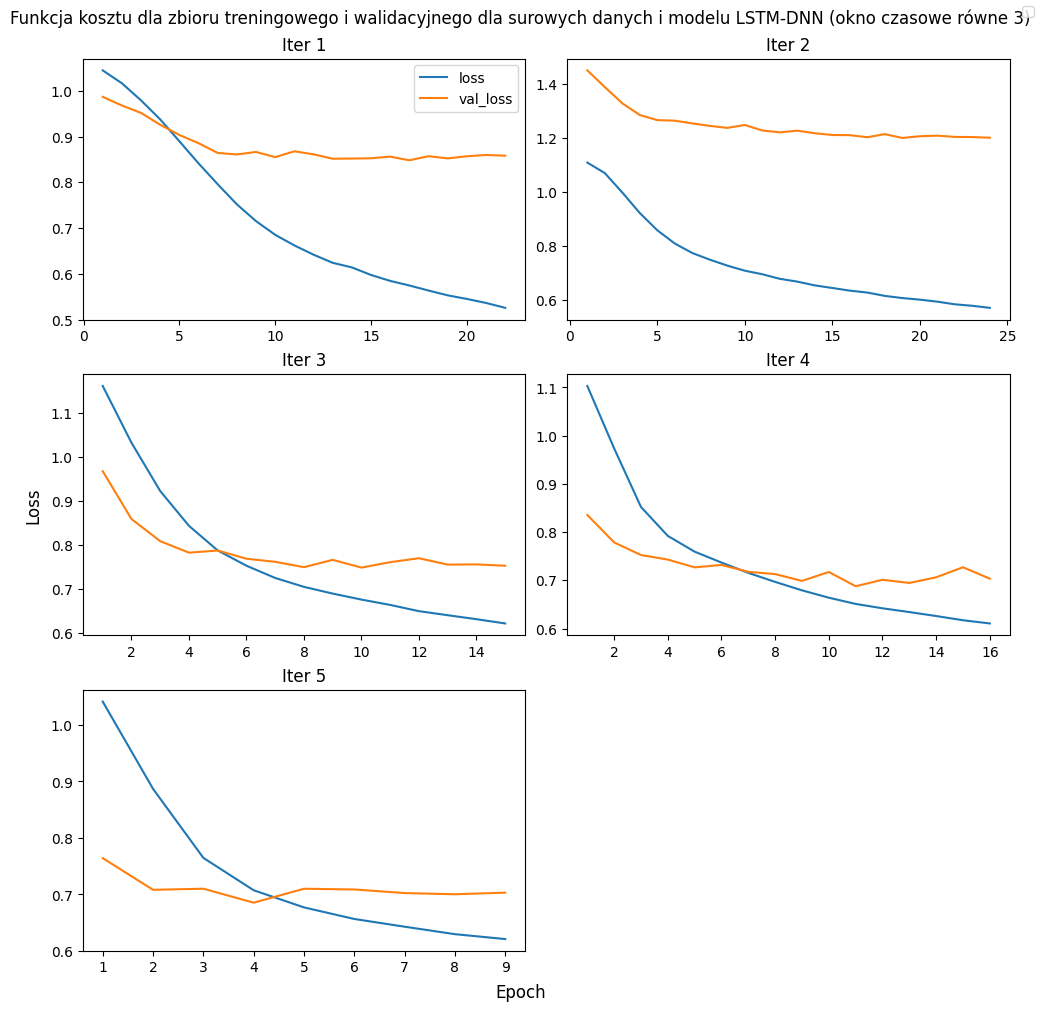

In [450]:
plot_history(raw_LSTM_DNN_optim_lag_3, "Funkcja kosztu dla zbioru treningowego i walidacyjnego dla surowych danych i modelu LSTM-DNN (okno czasowe równe 3)")